Nome: Fabio Grassiotto

RA: 890441

Curso: IA901A

# Ex04 - Filtragem de Imagens

Nesta atividade vamos entender a operação de convolução e o uso da mesma para filtragem de imagens. Testaremos o uso de **filtros suavizantes**, usados para a remoção de ruído, e **filtros aguçantes**, usados para detecção de bordas.  

- **Filtros suavizantes:** são aqueles que removem a nitidez da imagem fazendo uma média, aritmética ou ponderada, na janela do núcleo. O filtro ponderado suavizante mais comum é o da gaussiana. Filtros suavizantes são muito utilizados para eliminar ruído de uma imagem.

- **Filtros aguçantes:** são aqueles que realçam as bordas da imagem. Alguns dos filtros aguçantes comuns são: Filtro de Sobel, Filtro de Prewitt, Filtro Laplaciano.

Veja mais no notebook sobre [Filtragem no domínio espacial](https://github.com/lrittner/Computacao-Visual/blob/master/tutoriais/07_Filtragem_no_dominio_espacial.ipynb)

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage.filters as skf
from scipy.ndimage import convolve
import os
from google.colab import drive 
drive.mount('/content/gdrive')
path = "gdrive/MyDrive/P_IA901A_2023S1/IA901A_Ex04/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


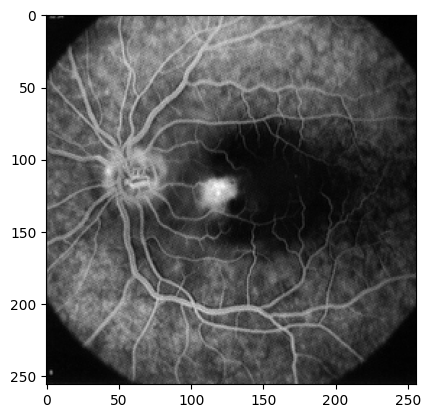

In [2]:

%matplotlib inline
f = mpimg.imread(path+'retina.tif')  
plt.imshow(f,cmap='gray')

**ATENÇÃO** - as operações de filtragem alteram os valores e eles podem sair da faixa de 0 a 255. Portanto, fique atento à maneira como você está realizando as operações e visualizando os resultados. Algumas dicas:

- Uma boa prática é realizar as operações em ponto flutuante;
- Quando a visualização não corresponde ao esperado, desconfie que os valores sairam da escala e que os valores, de alguma maneira, estão sendo truncados;

## Exercício 4.1 - Operação de convolução e filtro da média

Entenda o uso da operação de convolução e experimente usá-la para entender o filtro da média. Siga o seguinte roteiro:
- crie uma imagem numérica pequena (7x7, por exemplo), crie um filtro de média (máscara 3x3) e use a função da biblioteca scipy (scipy.ndimage.convolve) para realizar a filtragem. Você precisará importar a biblioteca usando *from scipy.ndimage import convolve*,mas não é preciso instalar nada. Verifique numericamente que a filtragem esteja correta;
- repita a operação de filtragem com a mesma máscara da média e a de convolução na imagem da retina;
- faça experimentos variando o tamanho da máscara do filtro com a imagem da retina e compare as imagens resultantes;
- varie também o modos da função - '*reflect*', '*constant*', '*nearest*', '*mirror*', '*wrap*'- explicando as diferenças encontradas. Dica, você só conseguirá visualizar as diferenças se aumentar o tamanho da máscara (filtro);

Primeiro criei uma imagem numérica aleatória 7x7, e aplicamos o filtro de média 3x3 conforme o enunciado.

In [3]:
# Seu código aqui
from scipy.ndimage import convolve

# Função para criar o filtro
def create_filter(k):
  filter = np.ones((k,k))/(k*k)
  return filter

def filter_size(filter):
  return np.shape(filter)[0]

img = np.random.randint(5, size=(7, 7))
avg_flt = create_filter(3)

out = convolve(img, avg_flt, mode='wrap')

print('Imagem = \n', img)
print('Saída = \n', out)

Imagem = 
 [[0 2 2 2 3 2 4]
 [4 4 3 3 3 0 3]
 [1 0 1 0 2 0 2]
 [4 0 2 2 0 4 1]
 [4 3 0 4 2 0 3]
 [0 1 3 0 3 4 2]
 [1 0 0 0 0 0 1]]
Saída = 
 [[2 1 1 1 1 1 1]
 [2 1 1 2 1 2 1]
 [2 2 1 1 1 1 2]
 [1 1 1 1 1 1 2]
 [2 1 1 1 2 2 2]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 2 1]]


Aplicando a mesma convolução à imagem da retina:

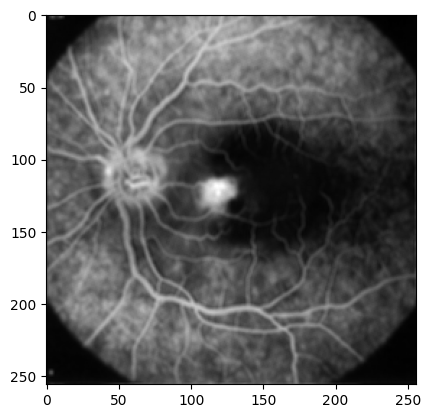

In [4]:
f_out = convolve(f, avg_flt, mode='wrap')
plt.imshow(f_out, cmap='gray')

Alterando o tamanho da máscara do filtro:

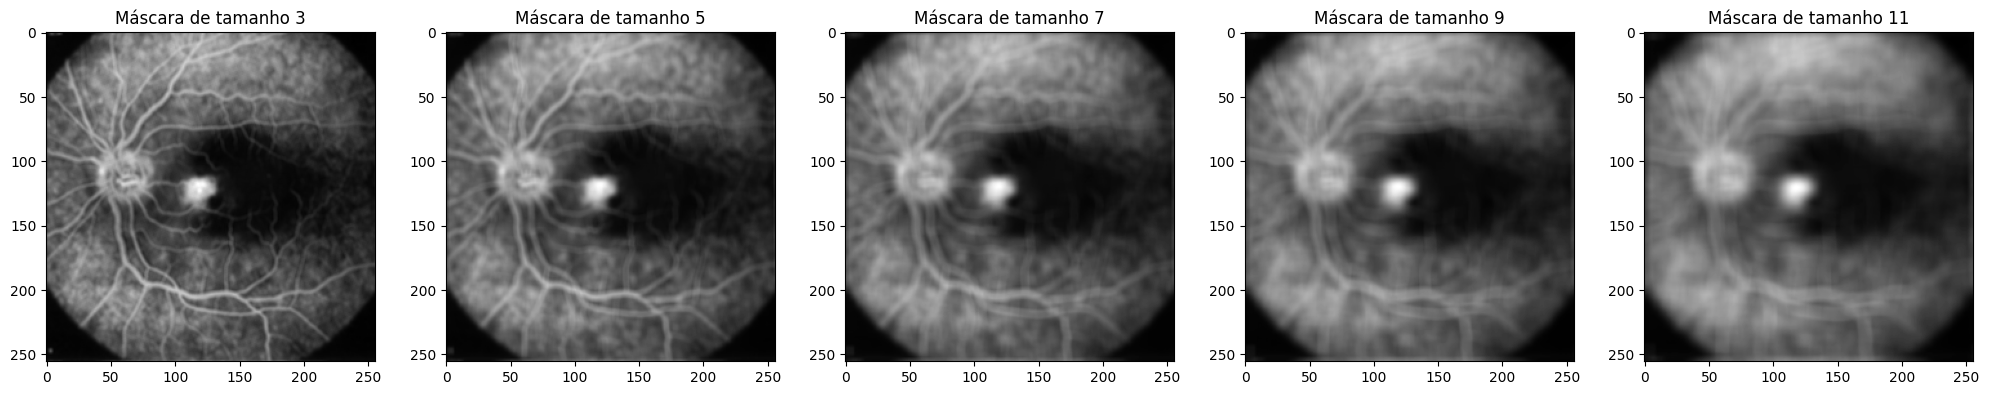

In [5]:
filters = []

for k in [3, 5, 7, 9, 11]:
  filters.append(create_filter(k))

# Convolução e plots.
fig, ax = plt.subplots(1, len(filters))
fig.set_size_inches(20, 5)
fig.tight_layout(w_pad=2)

i = 0
for flt in filters:
  f_out = convolve(f, flt, mode='wrap')
  ax[i].set_title('Máscara de tamanho ' + str(filter_size(flt)))
  ax[i].imshow(f_out, cmap='gray')
  i = i + 1

Podemos notar que com o aumento do tamanho do filtro de média a imagem da retina se torna progressivamente mais borrada.

Análise dos modos da função de convolução:

(0.0, 1.0, 0.0, 1.0)

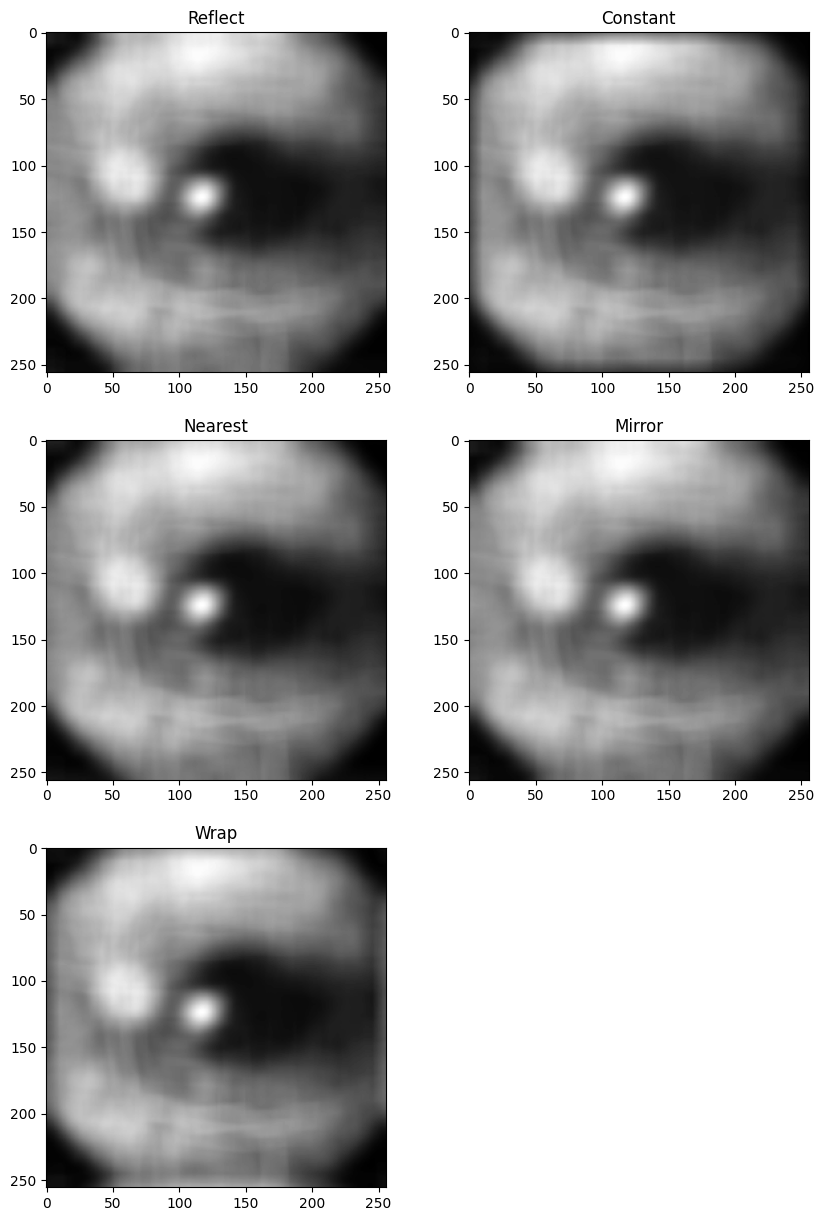

In [6]:
flt = create_filter(21)

# Convolução e plots.
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(10, 15)

# Variando os modos:
f_reflect = convolve(f, flt, mode='reflect')
ax[0, 0].set_title('Reflect')
ax[0, 0].imshow(f_reflect, cmap='gray')

f_constant = convolve(f, flt, mode='constant')
ax[0, 1].set_title('Constant')
ax[0, 1].imshow(f_constant, cmap='gray')

f_nearest = convolve(f, flt, mode='nearest')
ax[1, 0].set_title('Nearest')
ax[1, 0].imshow(f_nearest, cmap='gray')

f_mirror = convolve(f, flt, mode='mirror')
ax[1, 1].set_title('Mirror')
ax[1, 1].imshow(f_mirror, cmap='gray')

f_wrap = convolve(f, flt, mode='wrap')
ax[2, 0].set_title('Wrap')
ax[2, 0].imshow(f_wrap, cmap='gray')
ax[2, 1].axis('off')

Análise:

Nos diversos modos de preenchimento da matriz de entrada, podemos observar:

*   O modo *reflect* causa um achatamento da área da imagem devido ao uso de reflexão dos últimos pixels.
*   O modo *constant* mostra uma perda de precisão da imagem nas bordas, devido ao preenchimento estar usando um valor fixo para o pixel.
*   O modo *wrap* causa um achatamento da imagem nas bordas, devido ao preenchimento estar utilizando pixels do lado posterior da imagem.
*   Os demais modos não tem alterações tão perceptíveis.



## Exercício 4.2 - Filtro gaussiano e redução de ruído

Explore o filtro Gaussiano. Sugestões:
- teste a propriedade de decomposição das máscaras da convolução, ou seja, crie um filtro gaussiano bi-dimensional (3,3) a partir de 2 filtros unidimensionais (3,1) e (1,3);
- adicione ruído gaussiano à imagem da retina (sugestão: use np.random) e depois tente remover o ruído com o filtro gaussiano. Você pode aumentar o filtro gaussiano se quiser. Comente seu resultado. 

Validação da composição de máscaras de convolução:

In [7]:
# Filtro Gaussiano 3x3
g_3x3 = np.array([(1, 2, 1), (2, 4, 2), (1, 2, 1)])

# Dois filtros gaussianos resultantes da decomposição do filtro 3x3
g_3x1 = np.array([[1], [2], [1]])
g_1x3 = np.array([[1, 2, 1]])

# Criação de uma imagem simples 3x3 para testarmos a decomposição da convolução
img = np.array([(1, 0, 1), (0, 1, 0), (1, 0, 1)])

img_1 = convolve(img, g_3x1, mode='constant', cval=0.0)
img_2 = convolve(img_1, g_1x3, mode='constant', cval=0.0)

print('Resultado com dois passos de convolução:\n')
print(img_2)

print('\nResultado com um passo de convolução:\n')
img_direct = convolve(img, g_3x3, mode='constant', cval=0.0)

print(img_direct)


Resultado com dois passos de convolução:

[[5 6 5]
 [6 8 6]
 [5 6 5]]

Resultado com um passo de convolução:

[[5 6 5]
 [6 8 6]
 [5 6 5]]


Noto que o resultado da decomposição da máscara de convolução é o mesmo se aplicarmos a convolução direta do filtro 3x3.

Agora, adicionarei ruído à imagem e iremos remover com o filtro gaussiano:



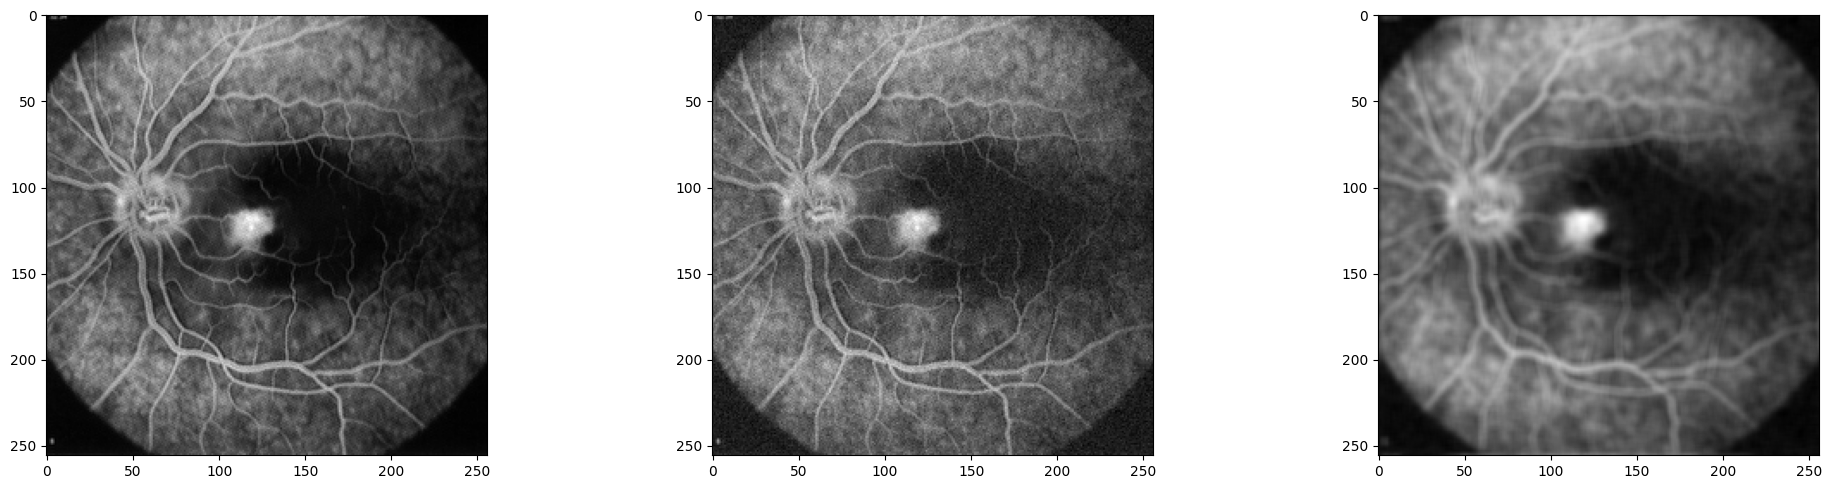

In [8]:
# Seu código aqui
from scipy import signal

# Função utilitária para criar o kernel gaussiano
def kernel(len, std):
    gkern1d = signal.gaussian(len, std=std).reshape(len, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

# Adicionar ruído à imagem (média 0, variância 10)
avg = 0
sigma = 10
noise = np.random.normal(avg, sigma, np.shape(f)) 
noisy_img = f + noise

# Filtro gaussiano de tamanho 5 e desvio padrão 10
g_flt = kernel(5, 10)
clean_img = convolve(noisy_img, g_flt, mode='wrap')

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(20, 5)
fig.tight_layout(w_pad=2)
ax[0].imshow(f, cmap='gray')
ax[1].imshow(noisy_img, cmap='gray')
ax[2].imshow(clean_img, cmap='gray')

Noto que o filtro gaussiano é bem capaz de eliminar o ruído da imagem, mas borra a imagem como um todo também.

## Exercício 4.3 - Filtro de Sobel e detecção de bordas

Existem vários filtros que procuram realçar as bordas da imagem. Um dos mais conhecidos é o Operador Sobel, composto por uma máscara vertical (Sv) e uma máscara horizontal (Sh).

In [9]:
import numpy as np

Sv = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print('Sv =\n',Sv)

Sh = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
print('Sh =\n',Sh)

Sv =
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
Sh =
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


### Exercício 4.3.1 - Visualizando as bordas verticais e horizontais em 2 imagens separadas

Para detectar bordas de uma imagem usando o Filtro de Sobel, precisamos fazer a filtragem da imagem usando tanto a máscara vertical, quanto a horizontal. No final, acabaremos com 2 imagens resultantes, cada uma reforçando as bordas verticais e horizontais, respectivamente. 

Experimente filtrar as imagens abaixo com os Filtros de Sobel vertical e horizontal e visualize o resultado. Para cada imagem, você deve obter uma imagem fitrada pelo Filtro de Sobel vertical - **fv** - e uma imagem filtrada pelo Filtro de Sobel horizontal - **fh**.

Text(0.5, 1.0, 'Bordas horizontais')

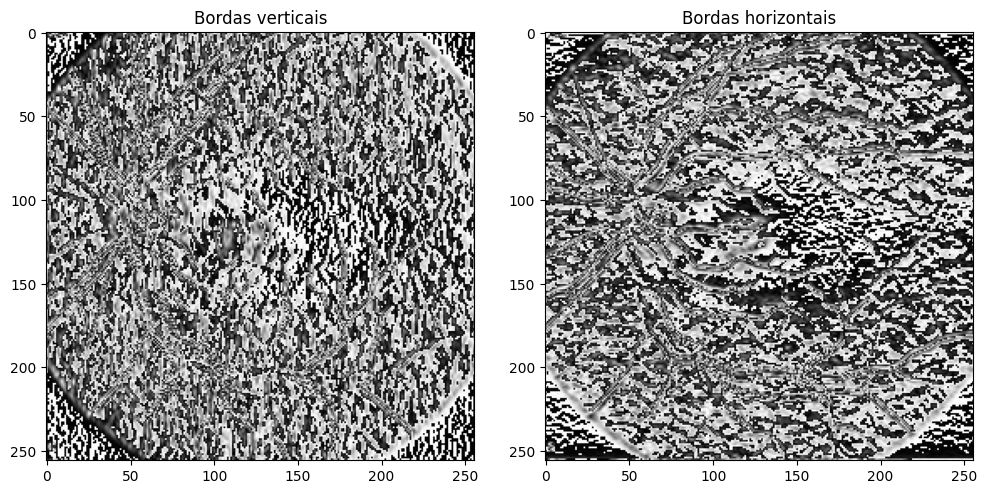

In [10]:
img1 = mpimg.imread(path+'retina.tif')

fv_eye = convolve(img1, Sv, mode='wrap')
fh_eye = convolve(img1, Sh, mode='wrap')

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
fig.tight_layout(w_pad=2)
ax[0].imshow(fv_eye, cmap='gray')
ax[0].set_title('Bordas verticais')
ax[1].imshow(fh_eye, cmap='gray')
ax[1].set_title('Bordas horizontais')

Text(0.5, 1.0, 'Bordas horizontais')

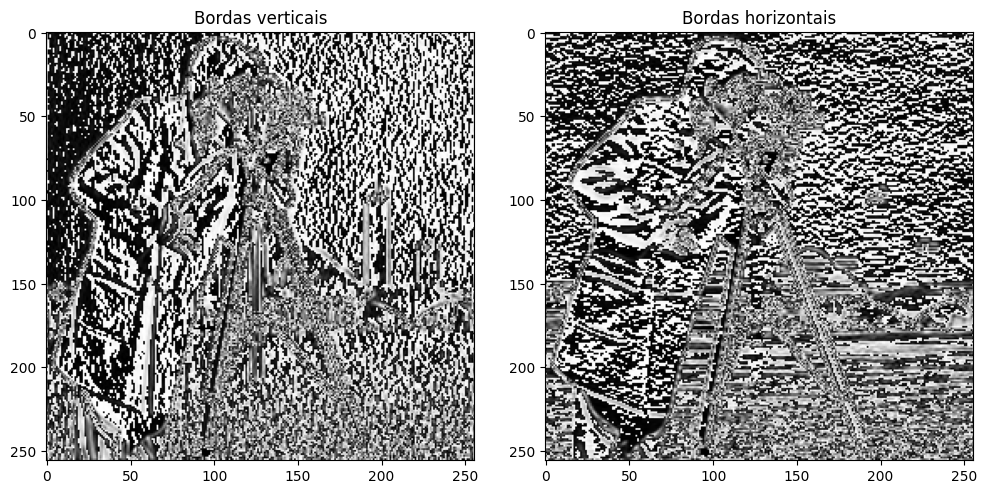

In [11]:
img2 = mpimg.imread(path+'cameraman.tif')

fv_photo = convolve(img2, Sv, mode='wrap')
fh_photo = convolve(img2, Sh, mode='wrap')

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
fig.tight_layout(w_pad=2)
ax[0].imshow(fv_photo, cmap='gray')
ax[0].set_title('Bordas verticais')
ax[1].imshow(fh_photo, cmap='gray')
ax[1].set_title('Bordas horizontais')

Noto que é bem claro nas duas imagens que os filtros foram capazes de identificar as bordas horizontais e verticais.

### Exercício 4.3.2 - Visualizando todas as bordas em uma única imagem

Para visualizar o resultado das 2 filtragens em uma única imagem, utilizamos a magnitude de Sobel. A função MagSobel a ser implementada possui como parâmetro a imagem de entrada e deve seguir a seguinte equação:

$$MagSobel = \sqrt{f_h^2 + f_v^2}$$

onde $f_h$ é a imagem de entrada convolvida com o operador de Sobel horizontal e $f_v$ é a imagem de entrada convolvida com o operador de Sobel vertical. Crie esta função e visualize a Magnitude Sobel das imagens geradas no item 3.1 (fv e fh).

Text(0.5, 1.0, 'Fotógrafo')

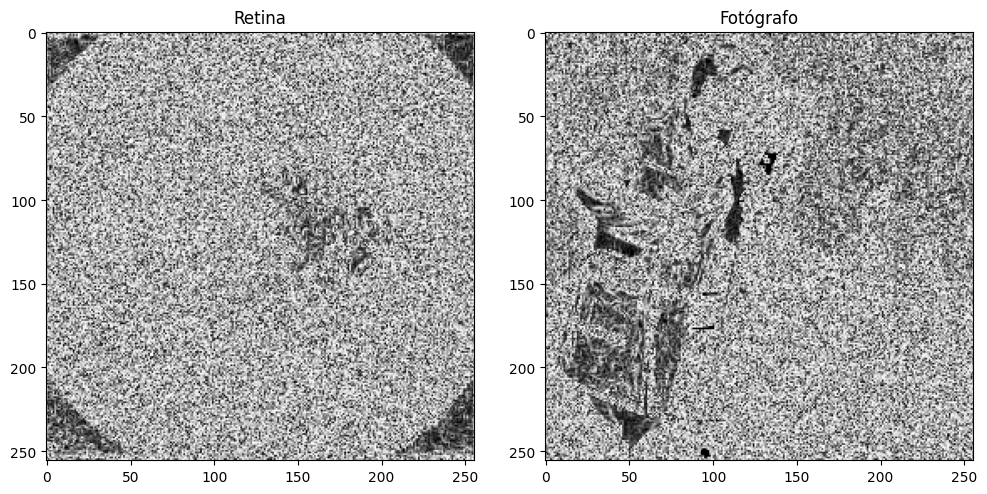

In [12]:
# Seu código aqui
import math

def magsobel(fh, fv):
  fh_sq = np.square(fh)
  fv_sq = np.square(fv)
  return np.sqrt(fh_sq + fv_sq)

img_eye = magsobel(fh_eye, fv_eye)
img_photo = magsobel(fh_photo, fv_photo)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
fig.tight_layout(w_pad=2)
ax[0].imshow(img_eye, cmap='gray')
ax[0].set_title('Retina')
ax[1].imshow(img_photo, cmap='gray')
ax[1].set_title('Fotógrafo')

Utilizando funções utilitárias da biblioteca Numpy para raiz quadrada e potência dos ítens da matriz, implementei a função magsobel() para obtermos a adição dos filtros horizontal e vertical, como pode ser visualizado nas imagens de saída.

#### Conclusões

* O filtro de média é uma implementação eficiente do algoritmo de embaçamento, com baixo custo computacional.
* O filtro gaussiano, mesmo com baixa otimização para a imagem em análise, é capaz de eliminar ruído aditivo.
* O exercício com o filtro de Sobel mostrou a capacidade de se detectar bordas horizontais e verticais, e depois adicionar os efeitos através da equação de Sobel.
